Feature Scaling of breast cancer wisconsin diagnostic 

1. Imported Dataset from this link: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
# COPIED FROM THE GIVEN LINK "IMPORT IN PYTHON"

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

2. Importing Necessary things for Feature Scaling

In [120]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

3. Viewing the dataset along with Rows & Columns

In [83]:
data = pd.concat([X, y], axis=1)
print(data.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

4. Checking if there is any NULL values existing. If exists, will have to drop column.

In [ ]:
print(data.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


5. Split data

In [ ]:
# Features & target
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

6. Scale features

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7. Train a simple model (Logistic Regression)

In [87]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

8. Confusion matrix

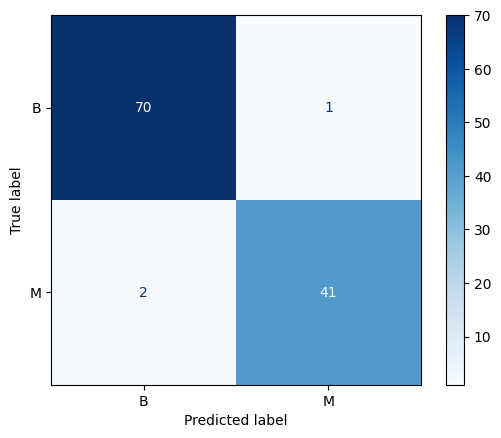

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()

9. Standardization (StandardScaler)

Formula:

𝑧=(𝑥−𝜇)/σ

Transforms features to mean = 0, std = 1.

Best for: algorithms that assume normal distribution (Logistic Regression, SVM, Neural Nets, K-Means).

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

10. Min-Max Normalization (MinMaxScaler)

Formula:
𝑥′= (𝑥−𝑥(min))/(𝑥(max)-𝑥(min))

Transforms features to [0, 1] range.

Best for: Neural networks, distance-based methods (KNN).

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

11. Robust Scaling (RobustScaler)

Uses median and IQR instead of mean/std → more robust to outliers.
Best for: datasets with many outliers.

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

12. Normalizer 

In [92]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

13. Power Transformer (Box-Cox / Yeo-Johnson)

Makes data more Gaussian-like.
Useful if features are highly skewed.

In [93]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')  # works with negatives too
X_scaled = scaler.fit_transform(X)

14. Check train/test split

In [94]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


15. Logistic regression Model's Different Scaling Techniques together

In [121]:
# --- Logistic Regression without scaling ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')
rec = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("Logistic Regression without scaling:")
print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}\n")

# --- Logistic Regression with different scaling techniques ---
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

for scaler_name, scaler in scalers.items():
    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='M')
    rec = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')
    
    print(f"Logistic Regression with {scaler_name}:")
    print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}\n")

Logistic Regression without scaling:
Accuracy: 0.96, Precision: 0.97, Recall: 0.91, F1-score: 0.94

Logistic Regression with StandardScaler:
Accuracy: 0.97, Precision: 0.98, Recall: 0.95, F1-score: 0.96

Logistic Regression with MinMaxScaler:
Accuracy: 0.98, Precision: 1.00, Recall: 0.95, F1-score: 0.98

Logistic Regression with RobustScaler:
Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1-score: 0.98



c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16. Bar Plot of Accuracies (compare scalers)

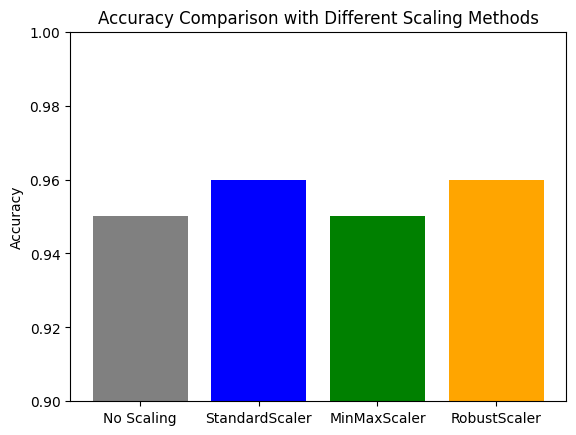

In [96]:
# Store results
results = {"No Scaling": 0.95, "StandardScaler": 0.96, "MinMaxScaler": 0.95, "RobustScaler": 0.96}

# Bar plot
plt.bar(results.keys(), results.values(), color=['gray','blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison with Different Scaling Methods")
plt.ylim(0.9, 1.0)
plt.show()


17. Confusion Matrix (example with StandardScaler)

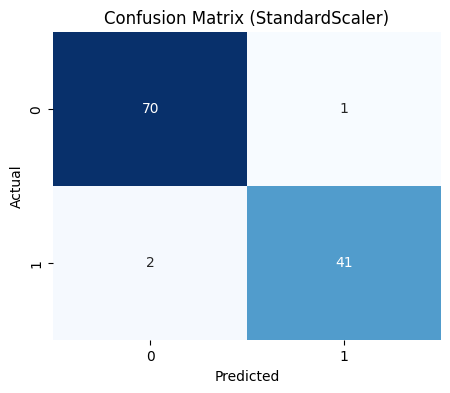

In [97]:
# Use StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (StandardScaler)")
plt.show()


18. Feature Distribution Before vs After Scaling (choosing any feature)

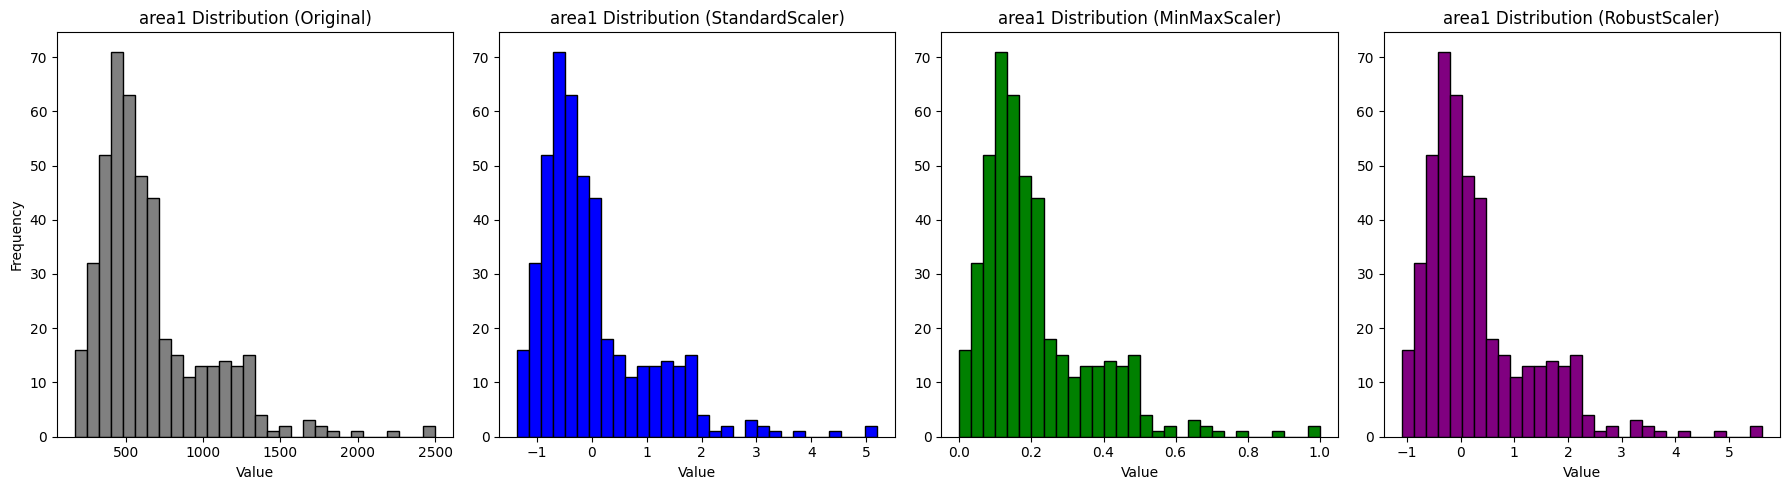

In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

# --- Choose a feature ---
feature = "area1"

# Original values
original_values = X_train[feature].values

# --- Apply different scalers ---
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

scaled_values_dict = {}
for name, scaler in scalers.items():
    scaled_values = scaler.fit_transform(original_values.reshape(-1,1)).flatten()
    scaled_values_dict[name] = scaled_values

# --- Plot Distribution Before vs After Scaling ---
plt.figure(figsize=(18,5))

# Original distribution
plt.subplot(1,4,1)
plt.hist(original_values, bins=30, color="gray", edgecolor="black")
plt.title(f"{feature} Distribution (Original)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# StandardScaler
plt.subplot(1,4,2)
plt.hist(scaled_values_dict["StandardScaler"], bins=30, color="blue", edgecolor="black")
plt.title(f"{feature} Distribution (StandardScaler)")
plt.xlabel("Value")

# MinMaxScaler
plt.subplot(1,4,3)
plt.hist(scaled_values_dict["MinMaxScaler"], bins=30, color="green", edgecolor="black")
plt.title(f"{feature} Distribution (MinMaxScaler)")
plt.xlabel("Value")

# RobustScaler
plt.subplot(1,4,4)
plt.hist(scaled_values_dict["RobustScaler"], bins=30, color="purple", edgecolor="black")
plt.title(f"{feature} Distribution (RobustScaler)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


19. Box Plot Before vs After Scaling

C:\Users\sumai\AppData\Local\Temp\ipykernel_21116\3754557023.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


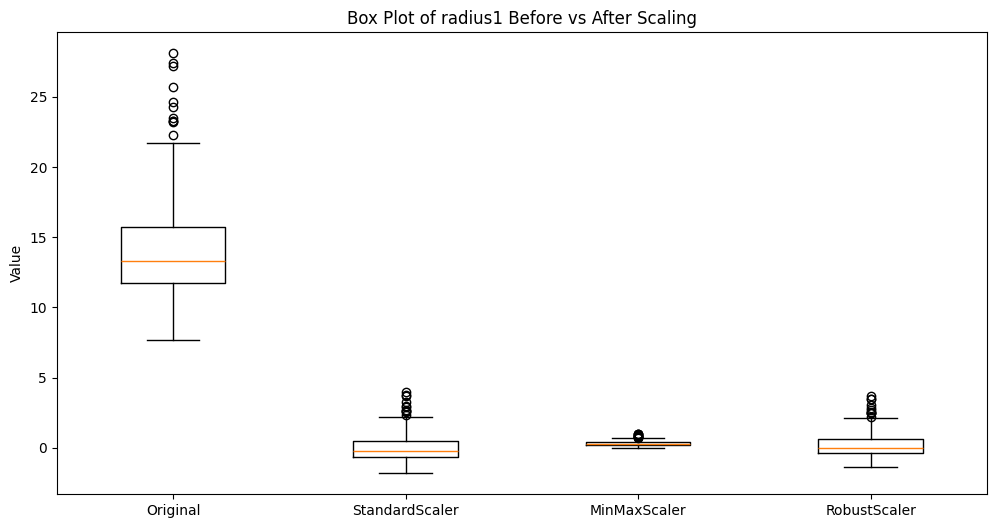

In [127]:
# Choose a feature to visualize
feature = "radius1"  # for example
original_values = X_train[feature]  # original values as a pandas Series

# --- Scale features ---
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

scaled_values_dict = {}
for name, scaler in scalers.items():
    # Reshape needed if it's a single feature
    scaled_values = scaler.fit_transform(original_values.values.reshape(-1,1))
    scaled_values_dict[name] = scaled_values.flatten()

# --- Box Plot Before vs After Scaling ---
plt.figure(figsize=(12,6))
plt.boxplot(
    [original_values, 
     scaled_values_dict["StandardScaler"], 
     scaled_values_dict["MinMaxScaler"], 
     scaled_values_dict["RobustScaler"]],
    labels=["Original", "StandardScaler", "MinMaxScaler", "RobustScaler"]
)
plt.title(f"Box Plot of {feature} Before vs After Scaling")
plt.ylabel("Value")
plt.show()

20. Target class distribution: Shows how many malignant (M) vs benign (B) cases are there.

Training set class counts:
Diagnosis
B    286
M    169
Name: count, dtype: int64

Test set class counts:
Diagnosis
B    71
M    43
Name: count, dtype: int64


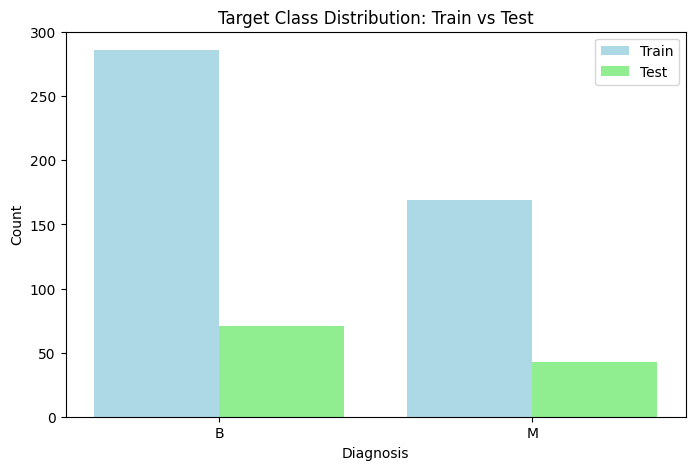

In [109]:
# Count classes
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Print counts with labels
print("Training set class counts:")
print(train_counts)
print("\nTest set class counts:")
print(test_counts)

# Side-by-side bar chart
labels = train_counts.index  # ['B', 'M']
x = range(len(labels))

plt.figure(figsize=(8,5))
plt.bar([i-0.2 for i in x], train_counts[labels], width=0.4, label='Train', color='lightblue')
plt.bar([i+0.2 for i in x], test_counts[labels], width=0.4, label='Test', color='lightgreen')

plt.xticks(x, labels)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Target Class Distribution: Train vs Test")
plt.legend()
plt.show()


Advance Feature Scaling

21. Train another simple model (Decision Tree)

In [110]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

22. Accuracy Checking of Decision Tree (Without Scaling)

Decision Tree Metrics:
Accuracy: 0.95, Precision: 0.93, Recall: 0.93, F1-score: 0.93


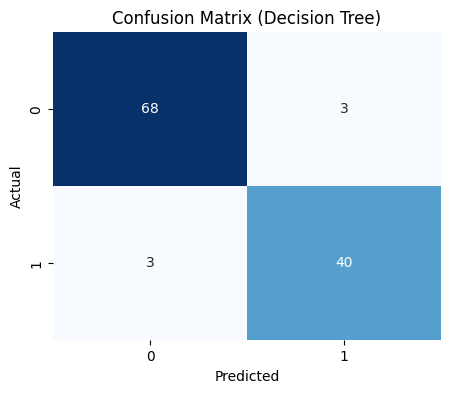

In [122]:
# --- Train Decision Tree ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# --- Predict on test set ---
y_pred = tree_model.predict(X_test)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')
rec = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("Decision Tree Metrics:")
print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

23. Decision Trees don’t require scaling. Stille tried to apply scaling. So StandardScaler applied

Decision Tree Metrics (with scaling):
Accuracy: 0.95, Precision: 0.93, Recall: 0.93, F1-score: 0.93


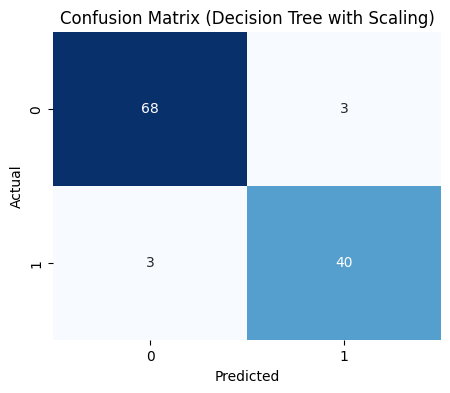

In [123]:
# --- Scale the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Decision Tree ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# --- Predict on test set ---
y_pred = tree_model.predict(X_test_scaled)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')
rec = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("Decision Tree Metrics (with scaling):")
print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree with Scaling)")
plt.show()

24. Row (horizontal) bar chart for "Model Accuracy" Comparison of Logistic Regression and Decision Tree without scaling.

c:\Users\sumai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


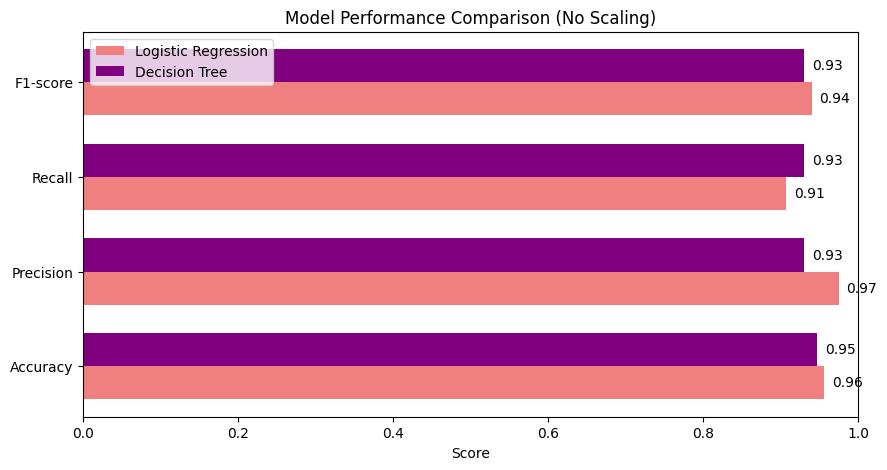

In [125]:
# --- Logistic Regression without scaling ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, pos_label='M')
rec_lr = recall_score(y_test, y_pred_lr, pos_label='M')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='M')

# --- Decision Tree without scaling ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree, pos_label='M')
rec_tree = recall_score(y_test, y_pred_tree, pos_label='M')
f1_tree = f1_score(y_test, y_pred_tree, pos_label='M')

# --- Metrics for plotting ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_values = [acc_lr, prec_lr, rec_lr, f1_lr]
tree_values = [acc_tree, prec_tree, rec_tree, f1_tree]

x = np.arange(len(metrics))
width = 0.35

# --- Grouped bar chart ---
plt.figure(figsize=(10,5))
plt.barh(x - width/2, lr_values, height=width, color='lightcoral', label='Logistic Regression')
plt.barh(x + width/2, tree_values, height=width, color='purple', label='Decision Tree')

plt.yticks(x, metrics)
plt.xlim(0,1)
plt.xlabel("Score")
plt.title("Model Performance Comparison (No Scaling)")
plt.legend()

# Add values on bars
for i in range(len(metrics)):
    plt.text(lr_values[i] + 0.01, i - width/2, f"{lr_values[i]:.2f}", va='center')
    plt.text(tree_values[i] + 0.01, i + width/2, f"{tree_values[i]:.2f}", va='center')

plt.show()

25. Row (horizontal) bar chart for "Model Accuracy" Comparison of Logistic Regression and Decision Tree with scaling. 

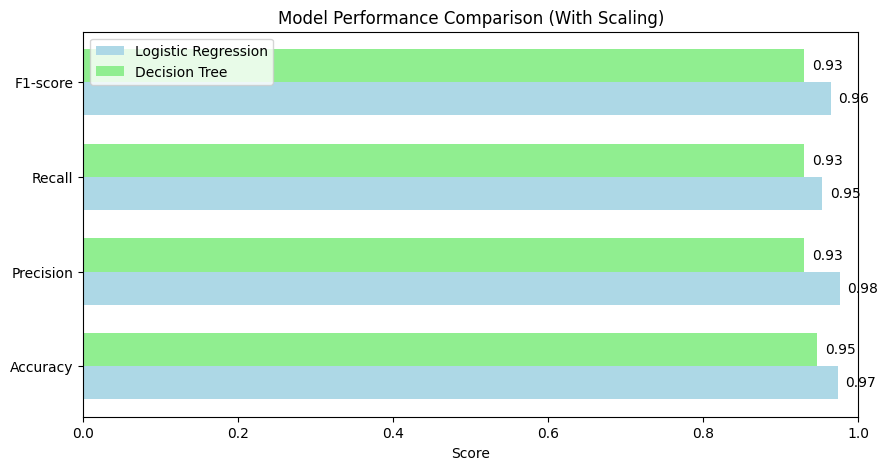

In [126]:
# --- Scale the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression with scaling ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, pos_label='M')
rec_lr = recall_score(y_test, y_pred_lr, pos_label='M')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='M')

# --- Decision Tree with scaling ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree, pos_label='M')
rec_tree = recall_score(y_test, y_pred_tree, pos_label='M')
f1_tree = f1_score(y_test, y_pred_tree, pos_label='M')

# --- Metrics for plotting ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_values = [acc_lr, prec_lr, rec_lr, f1_lr]
tree_values = [acc_tree, prec_tree, rec_tree, f1_tree]

x = np.arange(len(metrics))
width = 0.35

# --- Grouped horizontal bar chart ---
plt.figure(figsize=(10,5))
plt.barh(x - width/2, lr_values, height=width, color='lightblue', label='Logistic Regression')
plt.barh(x + width/2, tree_values, height=width, color='lightgreen', label='Decision Tree')

plt.yticks(x, metrics)
plt.xlim(0,1)
plt.xlabel("Score")
plt.title("Model Performance Comparison (With Scaling)")
plt.legend()

# Add values on bars
for i in range(len(metrics)):
    plt.text(lr_values[i] + 0.01, i - width/2, f"{lr_values[i]:.2f}", va='center')
    plt.text(tree_values[i] + 0.01, i + width/2, f"{tree_values[i]:.2f}", va='center')

plt.show()